In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


In [3]:
import pandas as pd

# Dosya yolları
path = "/kaggle/input/2000-16-traffic-flow-england-scotland-wales/"
df1 = pd.read_csv(path + "accidents_2005_to_2007.csv", low_memory=False)
df2 = pd.read_csv(path + "accidents_2009_to_2011.csv", low_memory=False)
df3 = pd.read_csv(path + "accidents_2012_to_2014.csv", low_memory=False)

# Birleştir
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape


(1504150, 33)

/tmp/ipykernel_36/3460337464.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


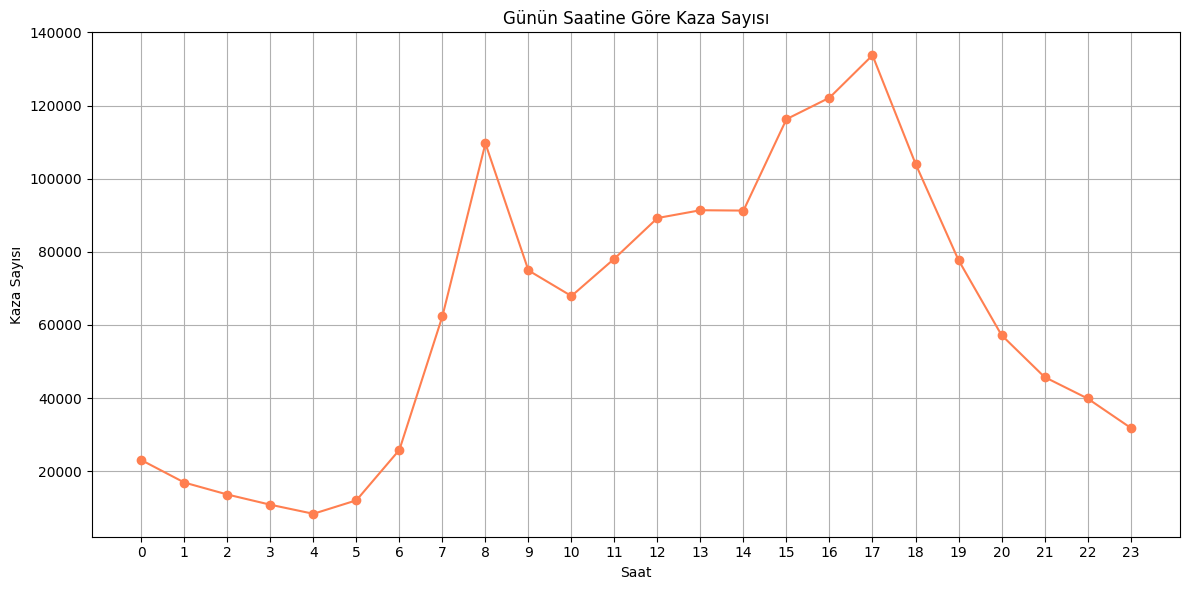

In [4]:
import matplotlib.pyplot as plt

df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
hourly_counts = df["Hour"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', color='coral')
plt.title("Günün Saatine Göre Kaza Sayısı")
plt.xlabel("Saat")
plt.ylabel("Kaza Sayısı")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


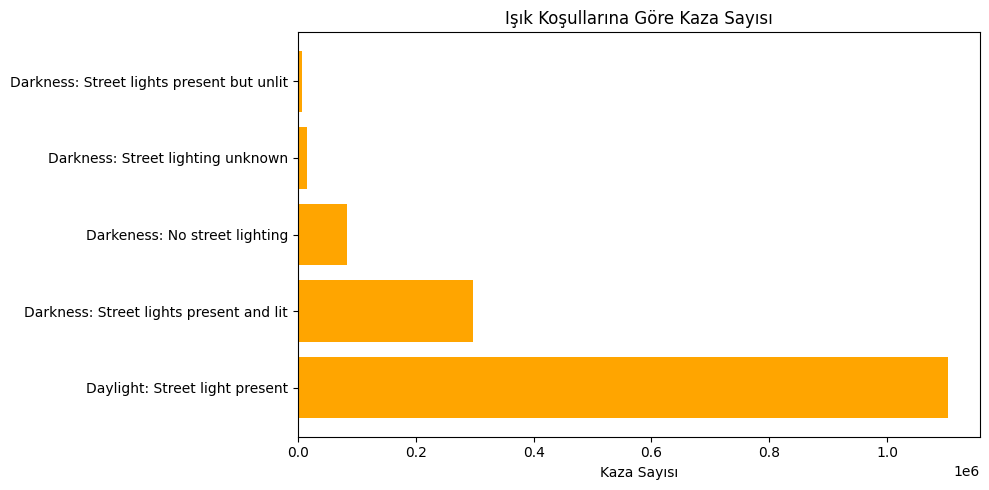

In [5]:
light_conditions = df["Light_Conditions"].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(light_conditions.index, light_conditions.values, color="orange")
plt.title("Işık Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


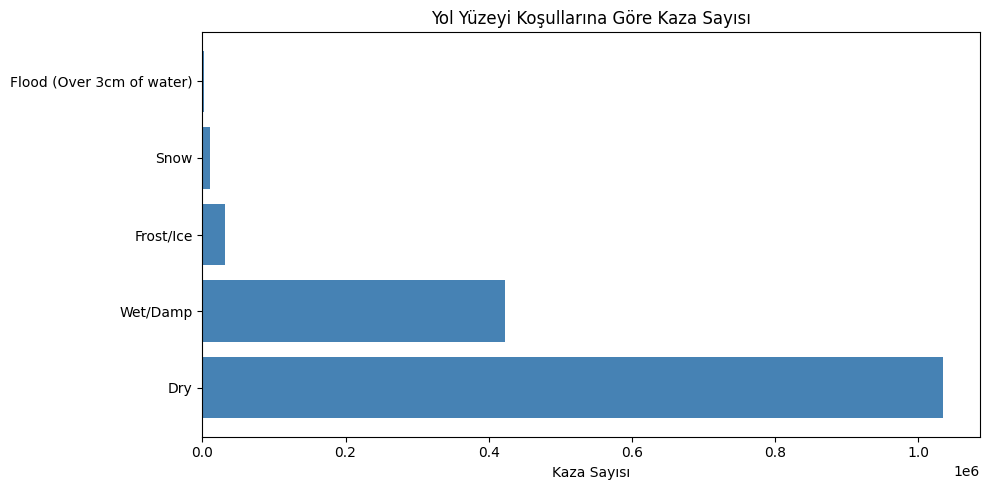

In [6]:
surface_conditions = df["Road_Surface_Conditions"].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(surface_conditions.index, surface_conditions.values, color="steelblue")
plt.title("Yol Yüzeyi Koşullarına Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


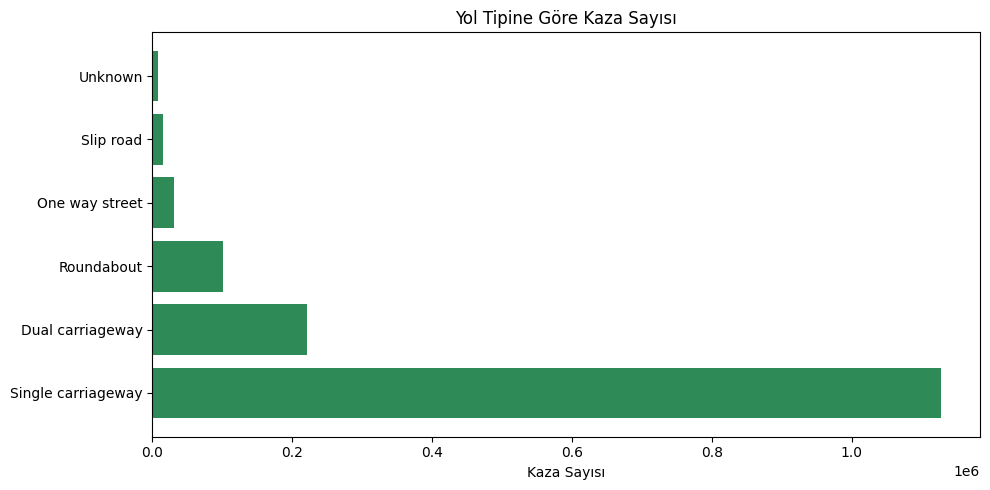

In [7]:
road_types = df["Road_Type"].value_counts().head(10)

plt.figure(figsize=(10, 5))
plt.barh(road_types.index, road_types.values, color="seagreen")
plt.title("Yol Tipine Göre Kaza Sayısı")
plt.xlabel("Kaza Sayısı")
plt.tight_layout()
plt.show()


In [8]:
severity_light = df.groupby(["Accident_Severity", "Light_Conditions"]).size().unstack(fill_value=0)
severity_light


Light_Conditions,Darkeness: No street lighting,Darkness: Street lighting unknown,Darkness: Street lights present and lit,Darkness: Street lights present but unlit,Daylight: Street light present
Accident_Severity,,,,,
1,3600,191,4056,127,11467
2,15957,2061,44253,1018,141215
3,63002,13868,248031,5764,949540


In [9]:
severity_surface = df.groupby(["Accident_Severity", "Road_Surface_Conditions"]).size().unstack(fill_value=0)
severity_surface


Road_Surface_Conditions,Dry,Flood (Over 3cm of water),Frost/Ice,Snow,Wet/Damp
Accident_Severity,,,,,
1,13032,41,326,74,5956
2,143700,288,3618,1033,55664
3,877938,1814,27461,9390,361857


In [10]:
severity_road = df.groupby(["Accident_Severity", "Road_Type"]).size().unstack(fill_value=0)
severity_road


Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Accident_Severity,,,,,,
1,3874,202,308,14870,127,60
2,26501,3891,8838,163009,1384,881
3,191366,26888,91317,949072,14157,7405


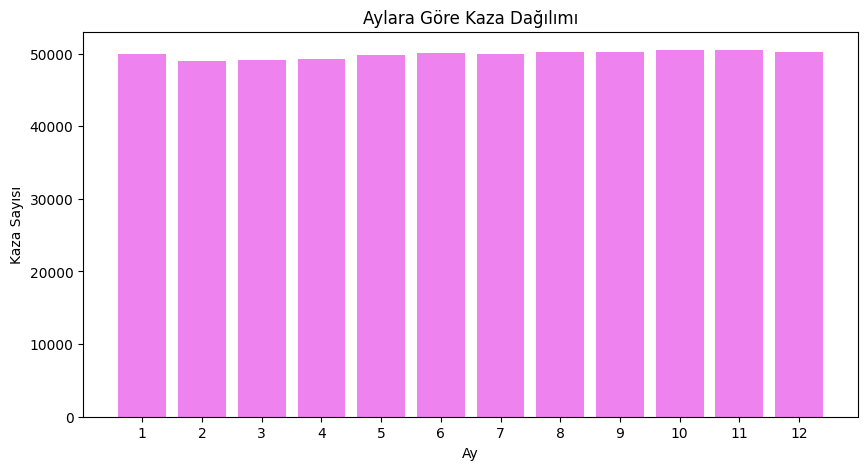

In [11]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Month"] = df["Date"].dt.month
monthly_counts = df["Month"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(range(1, 13), monthly_counts.values, color="violet")
plt.xticks(range(1, 13))
plt.title("Aylara Göre Kaza Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Kaza Sayısı")
plt.show()


In [12]:
df["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts()


Did_Police_Officer_Attend_Scene_of_Accident
Yes    1218877
No      282351
Name: count, dtype: int64

In [13]:
# Ortalama yaralı sayısı
ortalama_yarali = df["Number_of_Casualties"].mean()
print("Ortalama yaralı sayısı:", round(ortalama_yarali, 2))


Ortalama yaralı sayısı: 1.35


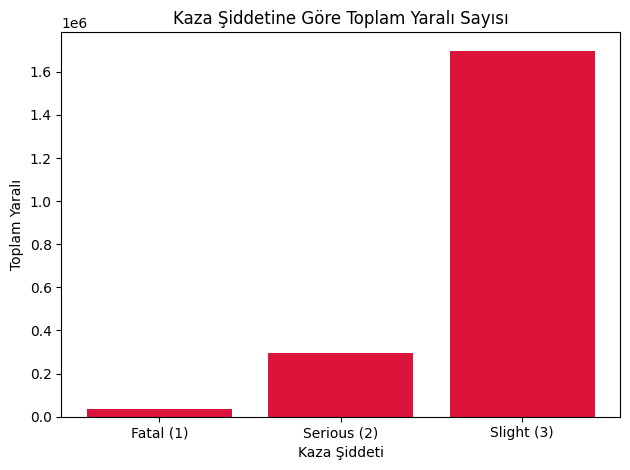

In [14]:
casualties_by_severity = df.groupby("Accident_Severity")["Number_of_Casualties"].sum().sort_index()

# Grafik
import matplotlib.pyplot as plt
labels = ["Fatal (1)", "Serious (2)", "Slight (3)"]
plt.bar(labels, casualties_by_severity.values, color="crimson")
plt.title("Kaza Şiddetine Göre Toplam Yaralı Sayısı")
plt.xlabel("Kaza Şiddeti")
plt.ylabel("Toplam Yaralı")
plt.tight_layout()
plt.show()


In [15]:
# Işık, Yol ve Hava Koşullarına göre ortalama yaralı
df.groupby("Light_Conditions")["Number_of_Casualties"].mean().sort_values(ascending=False).head(5)

df.groupby("Road_Surface_Conditions")["Number_of_Casualties"].mean().sort_values(ascending=False).head(5)

df.groupby("Weather_Conditions")["Number_of_Casualties"].mean().sort_values(ascending=False).head(5)


Weather_Conditions
Fog or mist                   1.440415
Snowing with high winds       1.418878
Raining with high winds       1.395858
Raining without high winds    1.394376
Fine with high winds          1.374285
Name: Number_of_Casualties, dtype: float64